In [115]:
# import python libraries....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# import csv file...
df=pd.read_csv(r"C:\Users\priti\Downloads\Datasets\diwali dataset\Diwali Sales Data.csv", encoding='unicode_escape')


In [117]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [118]:
df.shape          #(no.of rows, no.of columns)

(11251, 15)

In [119]:
df.size


168765

In [120]:
df.ndim

2

In [121]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### There are total 15 columns, in which 8 columns have categorical values , 3 of a float type and rest are integer.

In [123]:
#checking for null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [124]:
# dropping blank columns...
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [125]:
# dropping null values...
df.dropna(inplace=True)

In [126]:
df.shape

(11239, 13)

In [127]:
# changing the data type of float column to int
df['Amount']=df['Amount'].astype('int')

In [128]:
df.duplicated().sum()

8

In [129]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [130]:
df.shape

(11231, 13)

# Exploratory Data Analysis 

###  Gender

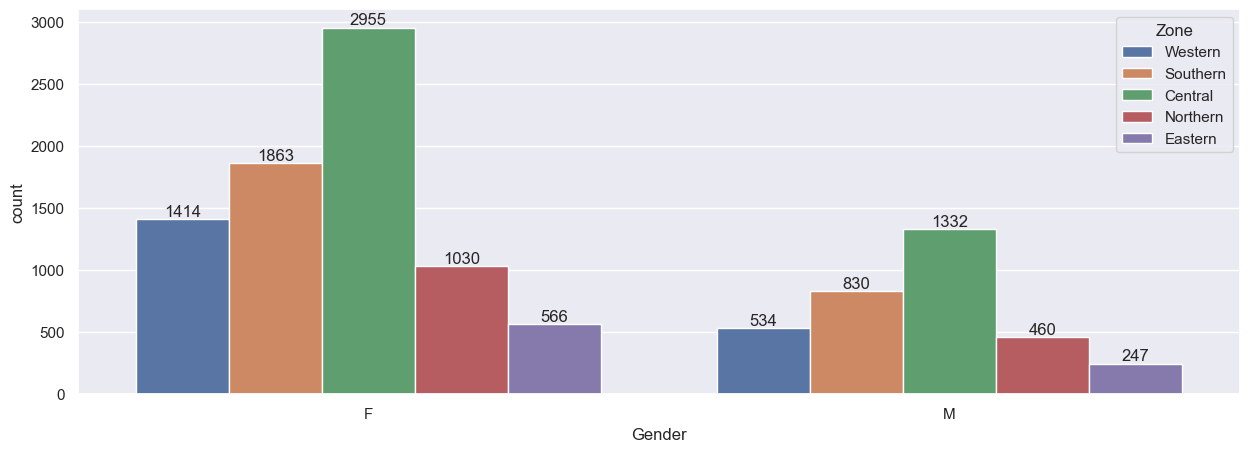

In [131]:
count=sns.countplot(x='Gender', data=df, hue='Zone')
for bars in count.containers:
    count.bar_label(bars)

### This dataset have more female customers from central zone than male.

In [132]:
# plotting a bar chart for gender vs total amount
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gender

,Gender,Amount
0,F,74307679
1,M,31871146


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

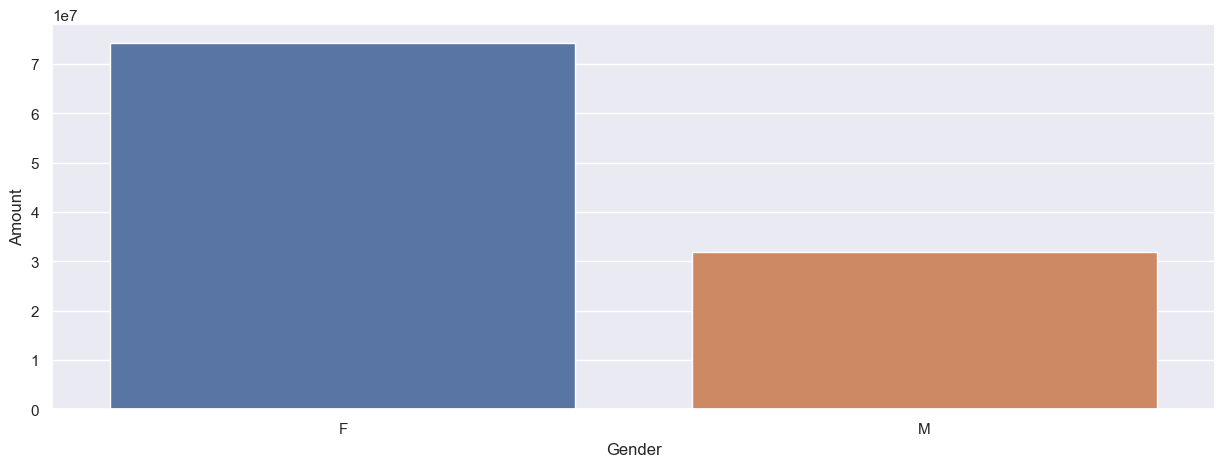

In [133]:
sns.barplot(x='Gender',y='Amount',data=sales_gender)

### From above graph, we can  see that the purchasing power of women are more than men. 

### Age 

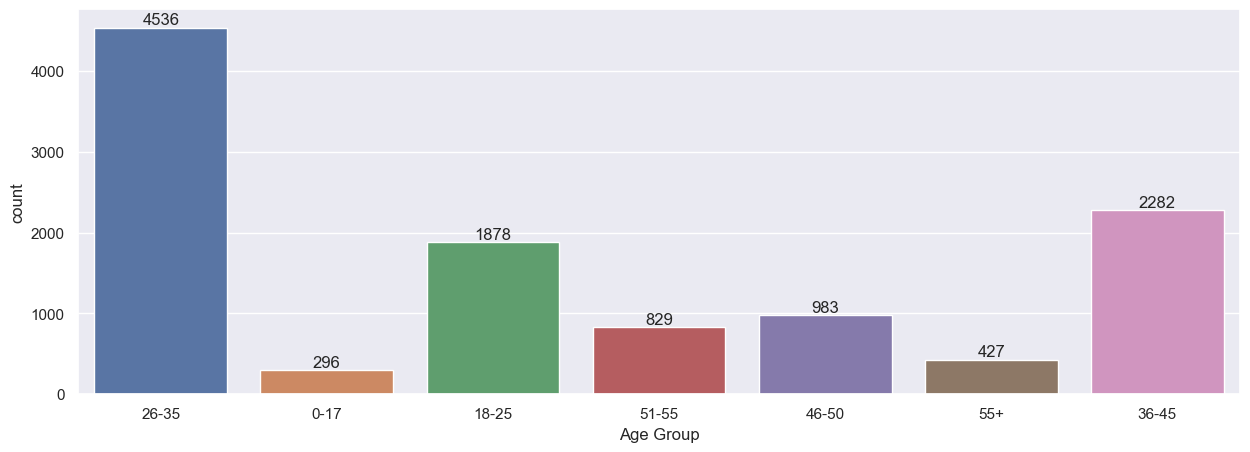

In [134]:
Age=sns.countplot(data=df,x='Age Group')
for bars in Age.containers:
    Age.bar_label(bars)

In [135]:
Sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
Sales_age

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

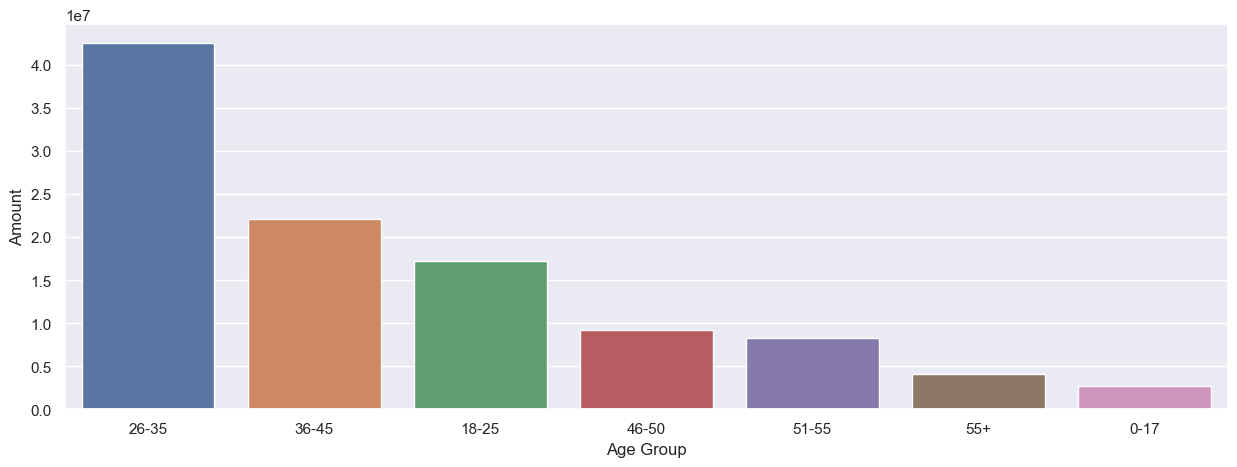

In [136]:
sns.barplot(x='Age Group',y='Amount', data=Sales_age)

<AxesSubplot:xlabel='Age Group', ylabel='Orders'>

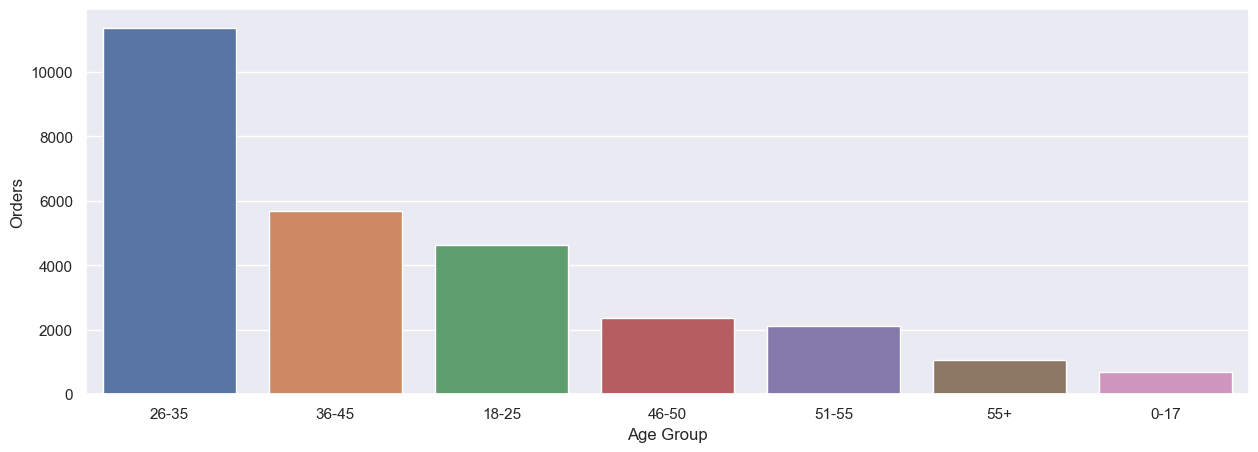

In [137]:
order_age=df.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
order_age
sns.barplot(x='Age Group', y='Orders', data=order_age)

###  Age group of 26-35 holds major purchasing power...

## State 

In [138]:
# total number of orders from the top 10 states
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


<AxesSubplot:xlabel='State', ylabel='Orders'>

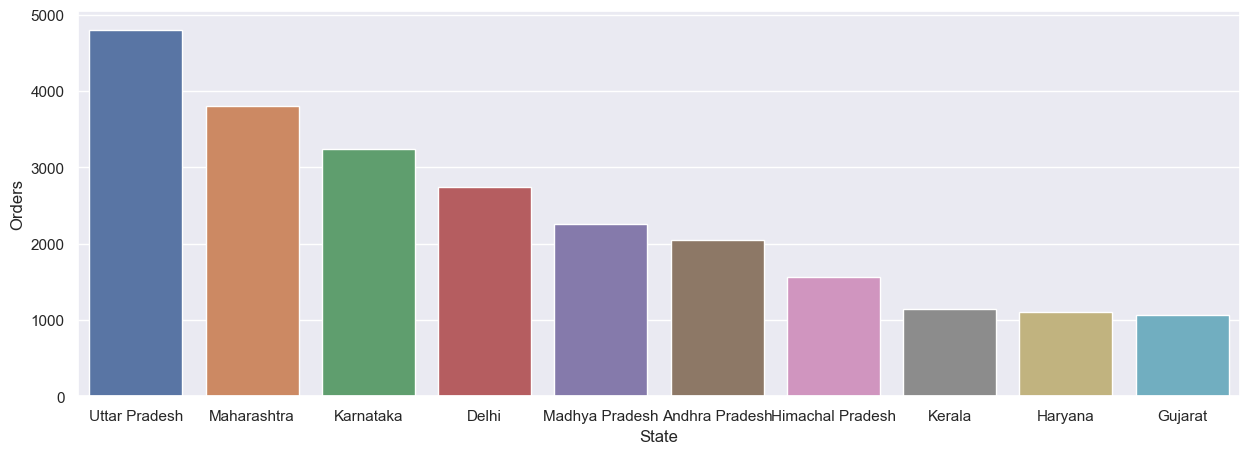

In [139]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders', data=sales_state)

### From above graph, we can say that the top 3 states in orders are Uttar Pradesh, Maharashtra and Karnataka.

In [140]:
# total amount from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [141]:
sales_state

,State,Amount
14,Uttar Pradesh,19346055
10,Maharashtra,14404467
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4217871
1,Bihar,4014669
3,Gujarat,3938159


<AxesSubplot:xlabel='State', ylabel='Amount'>

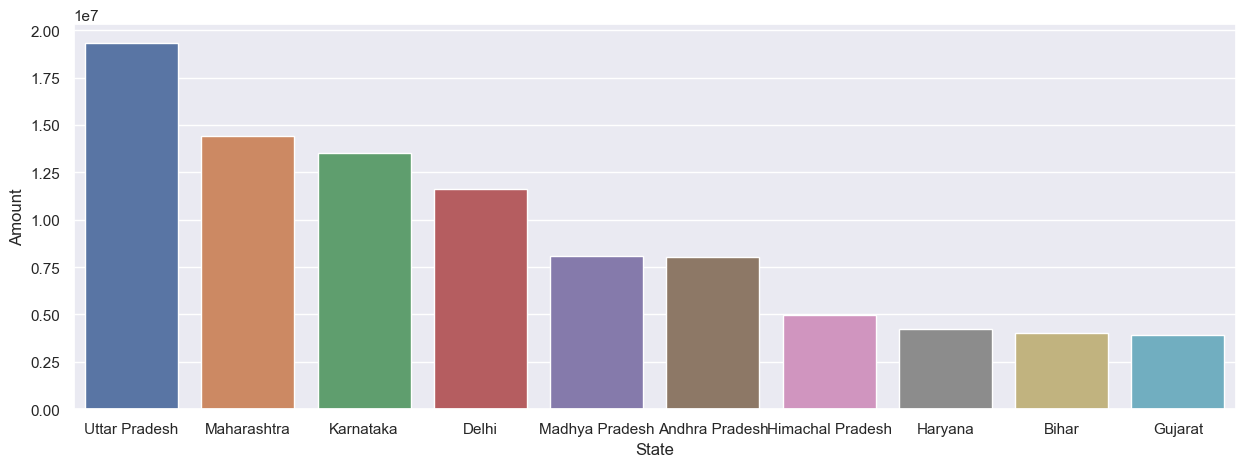

In [142]:
sns.barplot(x='State',y='Amount',data=sales_state)

### Most of the amount comes from Uttar Pradesh, Maharashtra and Karnataka.. 

##  Marital Status

In [143]:
# marital status and sales comparison
sales_marriage=df.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_marriage

,Marital_Status,Amount
0,0,62098734
1,1,44080091


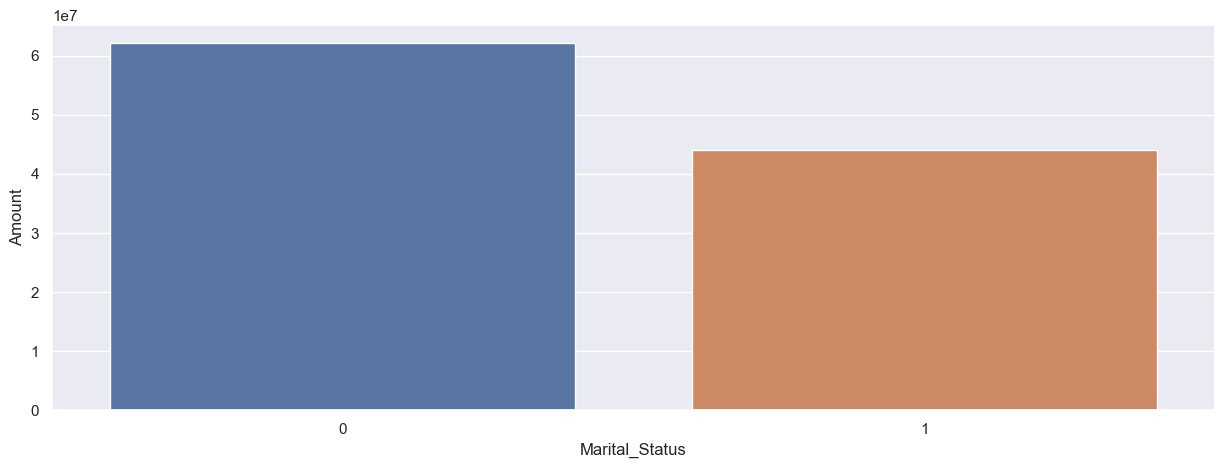

In [144]:
sns.barplot(x='Marital_Status',y='Amount',data=sales_marriage)
sns.set(rc={'figure.figsize':(71,5)})

###  From above graph, we can say that married buyer have high purchasing power.

## Occupation 

In [145]:
# occupation and sales comparison
sales_occ=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_occ

,Occupation,Amount
10,IT Sector,14741862
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6337633
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

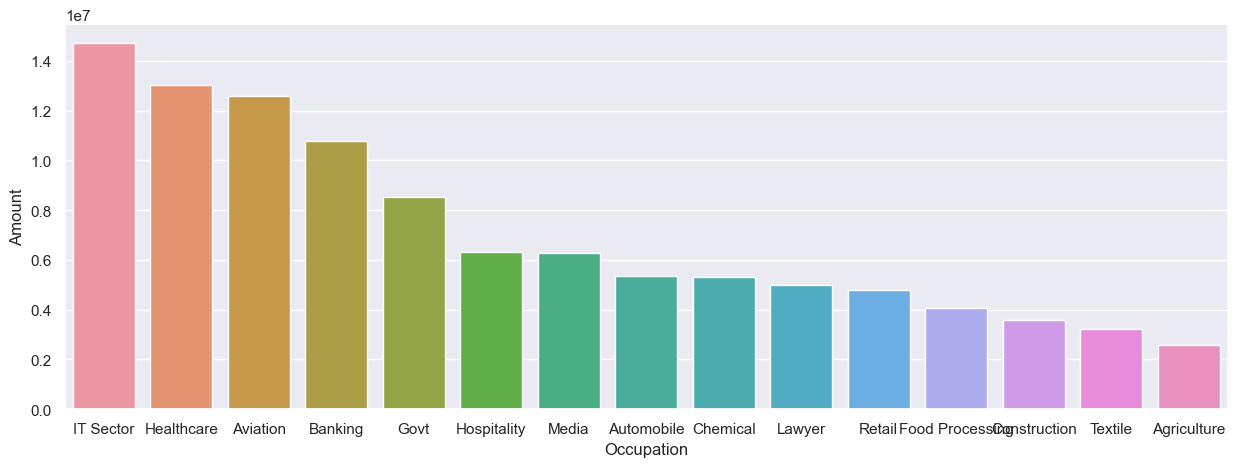

In [146]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occ)

### From the above graph, we can clearly see that most of the buyers are working in IT, Healthcare and Aviation sector. 

##  Product Category 

In [147]:
# product category and sales comparison
sales_prod=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_prod

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16484472
5,Electronics & Gadgets,15607657
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1935041
15,Stationery,1676051


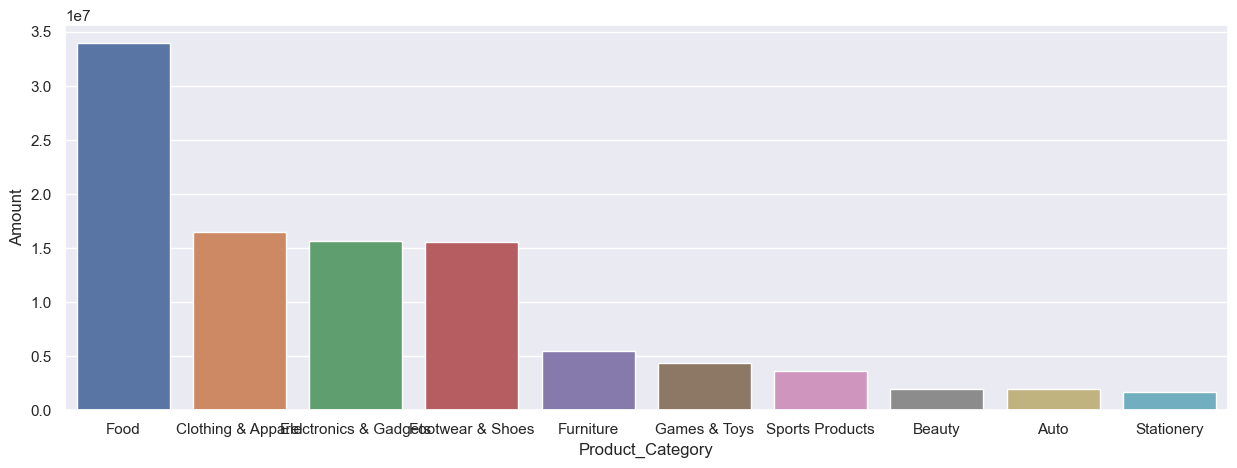

In [148]:
sns.barplot(data = sales_prod, x = 'Product_Category',y= 'Amount')
sns.set(rc={'figure.figsize':(15,10)})

### From the above graph, we can conclude that most of the sales are from Food, Clothing& Apparels and Electronics & Gadgets 

##  Products

In [149]:
# top ten selling products
sales_prod=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_prod

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
171,P00025442,79
679,P00114942,79
888,P00145042,76
708,P00117942,76
298,P00044442,75
643,P00110842,74


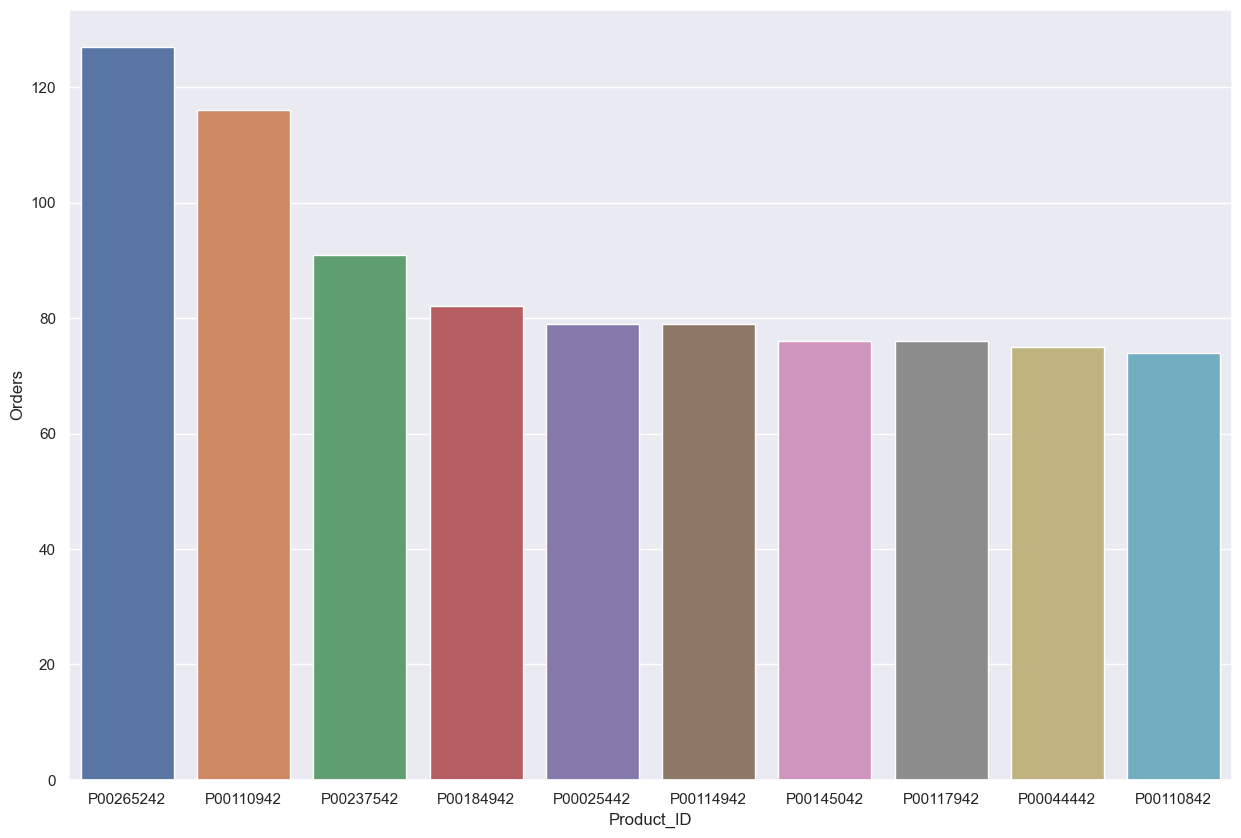

In [150]:
sns.barplot(x='Product_ID',y='Orders',data=sales_prod)
sns.set(rc={'figure.figsize':(15,5)})

### Above graph indicates top 10 selling products i.e. P00265242, P00110942 and P00237542 

# Conclusion: 

###  Married women of age group 26-35 mostly from central zone of Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from food, clothing Apparel and Electronics and gadgets.